<h1 style ="color:navy">Принятие решений в бизнесе</h1>

<div style ="color:navy; font-size:16pt"><b>Описание проекта</b></div>

1. Совместно с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Следует проанализировать этот список и найти приоритетные гипотезы для проверки.


2. После проведённого A/B-теста изучить полученные результаты, сравнить данные для разных групп пользователей с помощью статистических методов.

**Цели проекта**

- познакомиться с методами приоретизации гипотез;
- научиться анализировать результаты А/B теста;
- определить статистическую значимость полученных результатов.

**Ход исследования**

1. Приоретизация гипотез:
- определить приоритеты с помощью фреймворка  ICE;
- применить фреймворк RICE;
- сравнить и проанализировать полученные результаты.

2. Анализ результатов A/B-теста.
- загрузить и исследовать полученные данные;
- проверить данные на наличие ошибок;
- с помощью диаграмм рассеяния и вычисления персентилей определить аномальные данные, которые можно исключить как выбросы;
- рассчитать кумулятивные значения исследуемых метрик;
- построить и проанализировать графики динамики кумулятивных значений;
- построить графики относительной разницы между тестовой и контрольной группами по кумулятивным значениям, сделать соотвествующие выводы о стабилизации значений относительной разницы;
- сформулировать и проверить гипотезы о равенстве исследуемых метрик в разных группах А/В теста по сырым данным;
- вычислить р-уровень статистической значимости гипотез о равенстве метрик в тестовой и контрольной группах по данным, очищенным от выбросов;
- принять решение о продолжении или остановке теста и сделать соответствующие выводы.

<hr style="background-color:navy; align:left; height:2pt">

<h2 style="color:navy">Приоретизация гипотез</h2> 

### Загрузка данных и библиотек

In [1]:
# импорт библиотек
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# загрузка данных
try:
    hyp = pd.read_csv('/datasets/hypothesis.csv')
except:
    try:
        hyp = pd.read_csv('hypothesis.csv')
    except: 
        hyp = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
# посмотрим полученную таблицу
# display(hyp)

# отобразим весь текст в описании гипотез
pd.options.display.max_colwidth = None

# перепишем названия столбцов в нижний регистр
hyp.columns = hyp.columns.str.lower()
# исправим опечатку
hyp.loc[3, 'hypothesis'] = hyp.loc[3, 'hypothesis'].replace('структура', 'структуру')

display(hyp)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Датафрейм `hyp` из файла `hypothesis.csv` содержит следующую информацию:

- `hypothesis` — описание гипотезы;
- `reach` — охват пользователей по 10-балльной шкале;
- `impact` — влияние на пользователей по 10-балльной шкале;
- `confidence` — уверенность в гипотезе по 10-балльной шкале;
- `efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы;
- `hyp` - очень краткое описание изменений на сайте, которые предусматривает гипотеза.

###  Расчёт ICE и RICE

Рассчитаем значения ICE и RICE для каждой гипотезы в таблице по формулам:

$ ICE = \cfrac{Impact * Confidence}{Effort}$

$   RICE = \cfrac{Reach * Impact * Confidence}{Effort} = Reach * ICE $

Затем добавим полученные значения в таблицу и отсортируем её в порядке убывания приоритета.

In [4]:
hyp['ICE'] = round(hyp['impact'] * hyp['confidence'] / hyp['efforts'], 2)
hyp['RICE'] = hyp['reach'] * hyp['ICE']

print('\033[1mПриоритетные гипотезы по значению ICE:\033[0m')
display(hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
        .reset_index(drop=True).head(5))
print()
print('\033[1mПриоритетные гипотезы по значению RICE:\033[0m')
display(hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(5)
       .reset_index(drop=True).head(5))

Приоритетные гипотезы по значению ICE:


,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00



Приоритетные гипотезы по значению RICE:


,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
2,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99
4,"Запустить акцию, дающую скидку на товар в день рождения",16.20


**Общие рассуждения о значениях ICE и RICE:**


1. RICE получается из ICE умножением на оценку `reach`, которая показывает какую долю пользователей затронут изменения на сайте для каждой гипотезы. Поэтому нет ничего удивительного, что гипотезы в зависимости от метода расчёта будут иметь разный приоритет. Чем выше охват аудитории, тем выше в рейтинге поднимется гипотеза.


2. Расчёт приоритета гипотез с помощью RICE можно было бы считать более точным методом. Если, например, влияние на пользователей (т.е. их заинтересованность изменениями) большая, но изменения охватывают маленький процент пользователей (большое значение `impact` при низком значении `reach`), то и приоритет такой гипотезы после расчёта RICE уменьшится. Но в тоже время оценки зачастую субъективны. И чем больше будет оценок, тем менее точным может оказаться результат приоретизации. 


3. Значения RICE существенно выше, чем ICE. Дело в том, что ICE получается путём перемножения двух десятибальных оценок, делённых на одну, т.е. это значение имеет "размерность 1", а RICE - три оценки, делённые на одну, т.е. "размерность 2". По этой же причине разница между "соседними" значениями RICE будет увеличиваться быстрее для высоких оценок. Например, гипотеза на первом месте имеет значение 112, а вторая - всего 56. Чтобы проще было ориентироваться по цифрам, попробуем их стандартизировать и получим рейтинги, расчитанный по ICE и RICE:
    - из RICE - извлечём квадратный корень;
    - максимальные значения оценок сделаем равными 10, а остальные пересчитаем в процентном соотношении по сравнению с максимумом;
    - округлим до двух знаков после запятой.

In [5]:
#  стандартизируем ICE и RICE
hyp['ice_r'] = round(10 * hyp['ICE'] / hyp['ICE'].max(), 2)
hyp['rice_r'] = hyp['RICE']**.5
hyp['rice_r'] = round(10 * hyp['rice_r'] / hyp['rice_r'].max(), 2)

### Выбор наиболее перспективных гипотез

In [6]:
display(hyp.sort_values(by=['rice_r', 'ice_r'], ascending=False)
        .reset_index(drop=True)
        .style.background_gradient('Blues', subset=['ice_r','rice_r'])
        .format('{:.2f}', subset=['ice_r','rice_r', 'ICE', 'RICE']))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE,ice_r,rice_r
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00,6.91,10.00
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00,4.32,7.07
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99,8.23,5.98
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00,4.94,5.98
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20,10.00,3.80
5,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96,0.69,2.83
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00,1.23,1.89
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99,0.82,1.89
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00,0.62,1.64


Рассмотрим гипотезы в порядке возрастания приоритета RICE.

1. Гипотезы об изменении **цвета фона**, создании **страницы отзывов** клиентов и создании собственной **службы доставки** получили самый низкий приоритет. 
    - Проверку этих гипотез можно считать нецелесообразной. 


2. Несмотря на низкие значения ICE и RICE обратим внимание на 6-ую строку. "**Изменение структуры категорий**" затронет 80% клиентов. Проверка такого предположения довольно-таки затратна, а выгодность изменений не вызывает большой уверенности. 
    - Всё же гипотеза была выдвинута, а значит, навигация по товарам на сайте не всем удобна. Как вариант можно попытаться "локализовать" проблему. Если дело не во всей структуре категорий, а только в какой-то отдельной ветке или группе товаров, то можно снизить расходы на такие изменения и на проверку гипотезы. Можно также провести дополнительные малозатратные исследования, чтобы убедиться, что проблема действительно существует, а в будущем выдвинуть эту же гипотезу, но с большей уверенностью в результате. 

3. Максимальный приоритет, рассчитанный с помощью ICE получила гипотеза, "**Запустить акцию, дающую скидку на товар в день рождения**". В формулировке гипотезы не указаны подробности (процент скидки, возможность выбора любого товара или нескольких товаров и т.д.) и не высказано предположение, на изменение каких именно показателей стоит рассчитывать. Возможно увеличится число заказов за счёт именинников (предполагается высокий рейтинг влияния на пользователей) или сумма покупок в день рождения у клиента будет больше, чем обычно. Уверенность в результате оценена на 9 баллов из 10. Однако, было рассчитано, что такая акция коснется только 10% пользователей. Поэтому после расчёта RICE гипотеза отодвинулась на пятое место. 
    - Проверку этой гипотезы стоит, пожалуй, отложить, чтобы более чётко её сформулировать и уточнить верность оценок `confidence` и `reach`. (Наверное, у кого-то из отдела маркетинга скоро День Рождения 🙂)

4. "**Показ на главной странице баннеров** с актуальными акциями и распродажами, чтобы увеличить конверсию" имеет такой же приоритет по RICE, как и "привлечение новых каналов трафика". Баннеры заметят 50% посетителей магазина, сама гипотеза менее затратная, но привлечёт лишь 30% пользователей. Поэтому также как и в случае с новыми каналами привлечения:
    - Можно будет проверить гипотезу, если позволят возможности.

5. На третьем месте оказалась гипотеза, предлагающая "**добавить два новых канала привлечения трафика**". За счёт того, что изменения коснутся только 30% пользователей, эта строчка заняла 2-ое место по значению ICE, но 4-ое по RICE. Новые клиенты никогда не помешают магазину. 
    - Учитывая, что вероятность успеха при открытии новых каналов 80%, можно будет проверить эту гипотезу, если позволят возможности.

6. Предположение, что **рекомендация товаров** на сайте повысит конверсию и средний чек расположилось на втором месте по значению RICE, а по ICE похоже на предыдущую гипотезу, но немного от неё отстаёт за счёт меньшей уверенности в положительном результате проверки. Рекомендации на сайте пригодятся для 80% посетителей.
    - Эта гипотеза вторая в очереди на проверку по значению RICE, но стоит ещё раз проверить, не "запустить" ли её первой, так как изменения могут улучшить сразу две важных метрики. Не только **конверсию**, как в предыдущем случае, но и **средний чек покупки**. Во всей таблице это единственная такая гипотеза.  

7. Гипотеза "**Добавить форму подписки на все основные страницы**..." заняла первое по величине RICE и третье место по ICE. Предполагается, что изменения затронут 100% пользователей, а 70% будут добавлены в базу клиентов для email-рассылок. Проверив такую гипотезу и получив положительный результат, мы увеличим размер email-рассылок, но это может не оказать сильного влияния на основные бизнес-показатели нашего интернет-магазина. 
    - Стоит попытаться приотеризировать первые гипотезы из таблицы другим способом, учитывающим их важность. Например, методом **WSJF** или хотя бы с помощью матрицы Эйзенхауэра. Тогда приоритеты будут расставлены точнее. И можно будет принять окончательное решение.

### Визуализация результатов

Значения рейтингов, которые мы рассчитали можно сравнить и визуализировать. 

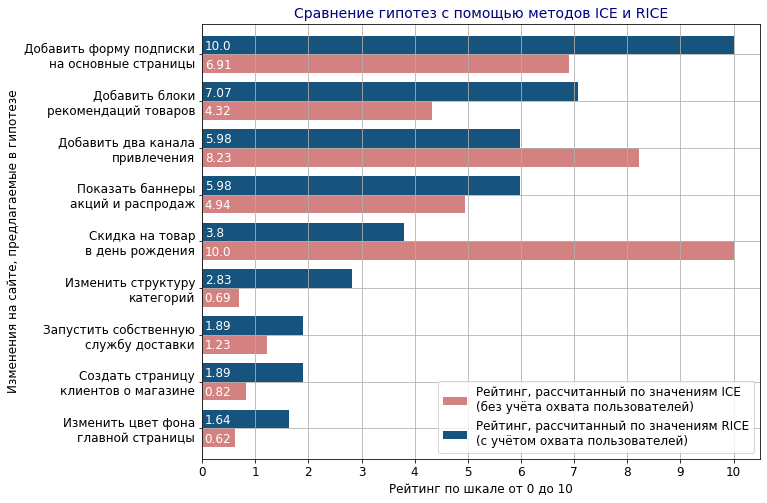

In [7]:
# Отсортируем таблицу и добавим столбец с сокращёнными названиями гипотез
hyp = hyp.sort_values(by=['rice_r', 'ice_r']).reset_index(drop=True)
hyp['hyp'] = ['Изменить цвет фона\nглавной страницы', 
              'Создать страницу\nклиентов о магазине', 
              'Запустить собственную\nслужбу доставки',
              'Изменить структуру\nкатегорий', 
              'Cкидка на товар\nв день рождения', 
              'Показать баннеры\nакций и распродаж', 
              'Добавить два канала\nпривлечения',
              'Добавить блоки\nрекомендаций товаров', 
              'Добавить форму подписки\nна основные страницы']

# создадим список любимых цветов
color_list = ['#d48281','#16537d','#7794a3', '#cf2c2c']

# выведем на столбчатой диаграмме
(hyp[['ice_r', 'rice_r', 'hyp']].set_index('hyp')
     .plot.barh(figsize=(10,8), color=color_list, 
                width=.8, grid=True))

# сделаем подписи значений на диаграмме
i = .1
for row in hyp['rice_r'] :
    plt.text(.05, i, row, horizontalalignment='left', color='white', size=12)
    i+=1
i = -.3
for row in hyp['ice_r'] :
    plt.text(.05, i, row, horizontalalignment='left', color='white', size=12)
    i+=1

# Подпишем
plt.title('Сравнение гипотез с помощью методов ICE и RICE', size=14, color='navy')
plt.xlabel('Рейтинг по шкале от 0 до 10', size=12)
plt.ylabel('Изменения на сайте, предлагаемые в гипотезе', size=12)
plt.legend(['Рейтинг, рассчитанный по значениям ICE\n(без учёта охвата пользователей)', 
            'Рейтинг, рассчитанный по значениям RICE\n(с учётом охвата пользователей)'],
           prop={'size': 12})    
plt.xticks([i for i in range(0,11)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show();

### Выводы

В качестве перспективных следует выбрать гипотезы:
1. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
2. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Рекомендации отделу маркетинга:
- перед тем, как принять окончательное решение, желательно дополнительно рассчитать приоритеты выбранных трёх гипотез с учётом их важности и срочности;
- в будущем следует тщательнее формулировать гипотезы, не забывая указывать какие именно метрики мы хотим улучшить при введении изучаемых изменений на сайте, тогда можно будет вернуться к гипотезе о скидке на товар в день рождения;
- не плохо будет изучить причины, по которым возникло желание измененить структуру категорий на сайте. Возможно, причина не во всей структуре, а только в отдельной её части. Можно попытаться снизить затратность тестирования такой гипотезы, чтобы к ней вернуться.

<hr style="background-color:navy; align:left; height:2pt">

<h2 style="color:navy">Анализ A/B-теста</h2> 

### Загрузка данных 

In [8]:
# импорт библиотек
# import pandas as pd
# from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [9]:
# загрузка данных
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    try:
        orders = pd.read_csv('orders.csv')
        visitors = pd.read_csv('visitors.csv')
    except: 
        orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
        visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [10]:
# информация о таблицах
print('\033[1mТаблица orders:\033[0m')
orders.info()
print()
print('\033[1mТаблица visits:\033[0m')
visitors.info()

Таблица orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Таблица visits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
# переименуем названия двух столбцов в таблице orders
orders.rename(columns={'transactionId': 'order_id',
                       'visitorId': 'user_id'}, inplace=True)

# переведём даты в формат дат
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# отсортируем таблицы для удобства в работе
orders = orders.sort_values(by=['date', 'group']).reset_index(drop=True)
visitors = visitors.sort_values(by=['date', 'group']).reset_index(drop=True)

# посмотрим на произвольные строки таблиц
display(orders)
display(visitors)

,order_id,user_id,date,revenue,group
0,1144701458,1143609305,2019-08-01,2750,A
1,477940151,1422773200,2019-08-01,700,A
2,1295850747,2947100995,2019-08-01,29499,A
3,1170105516,2706377257,2019-08-01,9024,A
4,1962247337,2706377257,2019-08-01,7129,A
...,...,...,...,...,...
1192,2886170101,930758570,2019-08-31,6674,B
1193,3845118557,1964413493,2019-08-31,160,B
1194,853409662,1390677121,2019-08-31,18557,B
1195,4149581711,1555048873,2019-08-31,1830,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


Таблица **orders** из файла `orders.csv`:
- `order_id` — идентификатор заказа;
- `user_id` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Таблица **visitors** из файла `visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучение данных

#### Поиск ошибок и подсчёт количественных показателей

При первом знакомсте с данными установлено, что:
- отсутствуют пропущенные значения и дубликаты;
- период наблюдений совпадает в двух таблицах;
- количество уникальных групп - две (например не возникло путаницы с русским/латинским написанием А и B);
- в таблице визитов для каждой даты только две записи - для двух разных групп;
- в таблице заказов только уникальные номера заказов (код проверок не прилагается).

Посмотрим, не закрались ли в данные какие-либо другие непонятные ошибки, например:
- для каждого номера заказа должна быть только одна строка в таблице orders;
- каждый пользователь может быть только в одной из групп.

Для этого вычислим количественные показатели по результатам теста.

In [12]:
# количество пользователей из двух групп не должно отличаться больше чем на 1%
value = visitors['visitors'].sum()
print(f'В тесте участвовало: \033[1m{value:,}\033[0m пользователей:'.replace(',', ' '))
value = visitors.query('group=="A"')['visitors'].sum()
print(f'- из них попало в группу А: \033[1m{value:,}\033[0m,'.replace(',', ' '))
value = value / visitors['visitors'].sum()
print(f'  что составляет \033[1m{value:0.1%}\033[0m')
value = visitors.query('group=="B"')['visitors'].sum()
print(f'- из них попало в группу B: \033[1m{value:,}\033[0m;'.replace(',', ' '))
value = value / visitors['visitors'].sum()
print(f'  что составляет \033[1m{value:0.1%}\033[0m')

В тесте участвовало: 37 652 пользователей:
- из них попало в группу А: 18 736 
  что составляет 49.8%
- из них попало в группу B: 18 916;
  что составляет 50.2%


Деление трафика на группы произведено корректно. Количество пользователей, попавших в разные группы различается меньше чем на пол-процента. 

In [13]:
# для каждого номера заказа должна быть только одна строка в таблице orders
print(f'За время теста было сделано \033[1m{len(orders):,}\033[0m заказов на сайте:'.replace(',', ' '))
value = len(orders.query('group=="A"'))
print(f'- из них покупателями группы А: \033[1m{value}\033[0m,')
value = value / len(orders)
print(f'  что составляет \033[1m{value:0.1%}\033[0m')
value = len(orders.query('group=="B"'))
print(f'- группы В: \033[1m{value}\033[0m,')
value = value / len(orders)
print(f'  что составляет \033[1m{value:0.1%}\033[0m')

За время теста было сделано 1 197 заказов на сайте:
- из них покупателями группы А: 557,
  что составляет 46.5%
- группы В: 640,
  что составляет 53.5%


Количество покупок по группам несущественно, но различается. Покупателей в тестовой группе чуть больше, чем в контрольной. 

#### Покупатели из двух групп

In [14]:
# каждый пользователь может быть только в одной из групп
value = (orders.groupby('user_id')['group'].nunique() != 1).sum()
print(f'Число покупателей, попавших в разные группы теста: \033[1m{value}\033[0m,')
value = value / orders['user_id'].nunique()
print(f'- это \033[1m{value:0.1%}\033[0m от общего числа покупателей')

# создадим список идентификаторов пользователей, попавших в 2 группы
duplicates = (orders.groupby('user_id')['group'].nunique() != 1).to_frame().query('group').index

# посчитаем строки таблицы orders для таких пользователей
value = len(orders.query('user_id.isin(@duplicates)'))
print(f'Покупатели, попавшие сразу в две группы сделали \033[1m{value}\033[0m заказов,')
value = value / len(orders)
print(f'- что составляет \033[1m{value:0.1%}\033[0m от общего количества заказов.')
print('И столько же раз они были посчитаны в качестве посетителей сайта')
value = value / visitors['visitors'].sum()
print(f'- а это \033[1m{value:0.5%}\033[0m от общего количества посетителей')

Число покупателей, попавших в разные группы теста: 58,
- это 5.6% от общего числа покупателей
Покупатели, попавшие сразу в две группы сделали 181 заказов,
- что составляет 15.1% от общего количества заказов.
И столько же раз они были посчитаны в качестве посетителей сайта
- а это 0.00040% от общего количества посетителей


Убедимся, что мы не ошиблись и в таблице `orders` действительно существуют пользователи, которые попали как в группу А, так и в группу В. Сохраним эти записи в отдельную таблицу `ab_users` (не путаем с абьюзерами 🙂).

In [15]:
ab_users = orders.query('user_id.isin(@duplicates)')
display(ab_users.sort_values(by=['user_id', 'date']).head(7))

,order_id,user_id,date,revenue,group
26,3679129301,8300375,2019-08-01,10510,B
264,4293855558,8300375,2019-08-07,1790,A
83,437656952,199603092,2019-08-02,3488,B
465,1941707234,199603092,2019-08-12,6438,A
585,2223239646,199603092,2019-08-15,3488,A
832,62794304,199603092,2019-08-22,6976,A
1012,2971973105,199603092,2019-08-27,2790,A


Перед применением А/B- теста обычно проверяется, что:
- инструмент «деления» трафика работает безошибочно;
- данные отправляются в системы аналитики корректно;
- попавший в одну из групп посетитель остаётся в этой группе до конца теста. 

По какой бы причине не произошла путаница, придется удалить более 15% данных о заказах. Иначе анализируемые данные будут некорректны, так как на поведение таких пользователей могло повлиять то, что они видели оба варианта тестируемых изменений на сайте. Цифра довольно большая, поэтому изучим покупателей из таблицы `ab_users`:

In [16]:
print('Размер выручки, руб. от заказов клиентов, попавших в две группы:')
display(ab_users.groupby('group')['revenue'].describe().astype('int').style.format(thousands=" "))

Размер выручки, руб. от заказов клиентов, попавших в две группы:


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,89,8 091,15 094,50,1 460,2 790,7 300,93 940
B,92,9 117,13 260,100,1 807,4 290,9 855,78 990


Средние суммы заказов для одних и тех же клиентов, разделённых на разные группы, мало отличаются. А вот медианы этих значений отличны друг от друга почти в 2 раза. Возможно всё же, что такие пользователи, попав после контрольной группы в тестовую, расходовали на заказы больше. 

Посмотрим, сколько покупок совершал каждый из них.

In [17]:
df_tmp = ab_users.groupby('user_id')['order_id'].nunique().value_counts().to_frame().reset_index()
df_tmp.columns = ['orders_per_user', 'number_of_users']
df_tmp = df_tmp.sort_values(by='orders_per_user')
df_tmp = df_tmp.set_index('orders_per_user')
display(df_tmp)

,number_of_users
orders_per_user,
2,35
3,10
4,3
5,6
8,1
9,1
11,2


Каждый из выбранных клиентов сделал от 2 до 11 заказов. Позже мы убедимся, что такое количество заказов нестандартно для имеющихся данных. Т.е. эти записи действительно лучше исключить из анализа. 

Можно ещё взглянуть, как распределены "пользователи из двух групп" по датам. 

In [18]:
display(ab_users.groupby('date')['order_id'].count().describe().to_frame().astype(int).T)

,count,mean,std,min,25%,50%,75%,max
order_id,31,5,3,1,3,5,8,16


Такие клиенты совершали покупки на сайте ежедневно в среднем 5 раз в день, а максимум - 16 раз.

Выше мы рассчитали, что их доля среди всех посетителей сайта составляет меньше, чем пол-процента. Но так как позже мы будем сравнивать результаты теста с данными без выбросов, т.е. будем исключать ещё больше пользователей, удалим их из таблицы `visitors` тоже.

In [19]:
# подсчитаем количество уникальных пользователей по дням и группам из таблицы ab_users
df_tmp = ab_users.groupby(['date', 'group'])['user_id'].nunique().to_frame().reset_index()
df_tmp.columns = ['date', 'group', 'ab_users']

# объединим получившуюся таблицу с таблицей посетителей, вычтем разницу
visitors = visitors.merge(df_tmp, on=['date', 'group'], how='left')
visitors['ab_users'] = visitors['ab_users'].fillna(0).astype(int)
visitors['visitors'] -= visitors['ab_users']

# оставим исходные столбцы
visitors = visitors[['date', 'group', 'visitors']]

# оставим в таблице orders только "правильных" пользователей
orders = orders.query('~user_id.isin(@duplicates)')

# для каждого номера заказа должна быть только одна строка в таблице orders
print('После удаления "покупателей из двух групп" в данных осталась информация о ')
print(f'\033[1m{len(orders):,}\033[0m заказах'.replace(',', ' '))

После удаления "покупателей из двух групп" в данных осталась информация о 
1 016 заказах


#### Количество посетителей по дням

Посмотрим, сколько посетителей заходило на сайт в течение дня

In [20]:
display(visitors.groupby('group')['visitors'].describe().astype(int))

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,31,601,112,361,539,618,700,753
B,31,607,117,368,532,649,709,768


Число посетителей в день для двух групп практически одинаковое, как и должно быть при правильном делении на группы. Посмотрим на графике

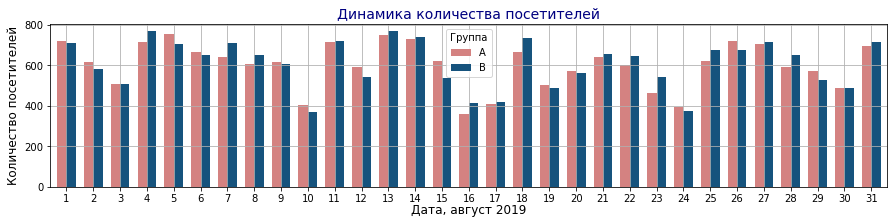

In [21]:
# Количество посетителей по дням
visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum').plot.bar(
        color=color_list, width=.7, figsize=(15,3), grid=True)

plt.title('Динамика количества посетителей', size=14, color='navy')
plt.ylabel('Количество посетителей', size=12)
plt.xlabel('Дата, август 2019', size=12, labelpad=.2)
plt.xticks(list(range(0,31)),list(range(1,32)), rotation=0)
plt.legend(title='Группа')
plt.show();


Ещё раз убеждаемся, что группы были разделены корректно, количество посетителей из разных групп почти не отличается. Прослеживается еженедельная тенденция. Меньше всего посетителей было на сайте по субботам. Для летнего периода это не удивительно.

#### Количество заказов по дням

Создадим таблицу `ord_vis`, присоединив к таблице visitors количество заказов каждый день. 

In [22]:
ord_vis = visitors.merge(orders.groupby(['date', 'group'])['order_id'].nunique(),
                            on=['date', 'group'])
ord_vis.rename(columns={'order_id': 'orders'}, inplace=True)

print('Количество заказов (покупок) за один день по группам:')
display(ord_vis.groupby('group')['orders']
        .describe().astype('int'))

Количество заказов (покупок) за один день по группам:


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,31,15,4,6,11,15,19,24
B,31,17,4,7,14,19,21,26


Ежедневно происходило от 13 до 50 покупок. Средние значения количества покупок в день для группы В немного выше. 

Посмотрим, как распределились заказы по дням наблюдения.

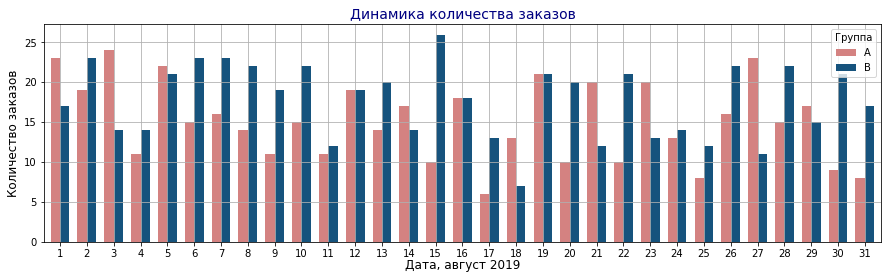

In [23]:
# посмотрим как распределилось количество заказов по дням
orders.pivot_table(index='date', columns='group', values='order_id', aggfunc='count').plot.bar(
        color=color_list, width=.7, figsize=(15,4), grid=True)

plt.title('Динамика количества заказов', size=14, color='navy')
plt.ylabel('Количество заказов', size=12)
plt.xlabel('Дата, август 2019', size=12, labelpad=.2)
plt.xticks(list(range(0,31)),list(range(1,32)), rotation=0)
plt.legend(title='Группа')
plt.show();

В дни, когда посетителей было меньше, количество заказов также уменьшается. Если количество посетителей в двух группах приблизительно одинаково, то количество заказов в группе В чаще оказывается больше. Особенно выделяется 15 августа, когда покупателей из группы В оказалось почти в 2 раза больше.

#### Доля покупателей среди посетителей

Посмотрим, какая часть посетителей сайта делала покупки. Добавим в таблицу `ord_vis` отношение количества заказов на посетителя.

In [24]:
# добавим столбец в таблицу ord_vis
ord_vis['ord_per_vis'] = ord_vis['orders'] / ord_vis['visitors']

print('Доля покупателей среди посетителей по дням:')
round(ord_vis.groupby('group')['ord_per_vis'].describe(), 4)

Доля покупателей среди посетителей по дням:


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,31.0,0.0260,0.0103,0.0115,0.0177,0.0234,0.0321,0.0499
B,31.0,0.0306,0.0108,0.0095,0.0238,0.0314,0.0355,0.0598


В среднем чуть больше 2% посетителей из группы А совершали покупки. Для группы В это значение составило около 3%. 
Доля покупателей среди посетителей в каждый из дней наблюдения не превышала 6%.

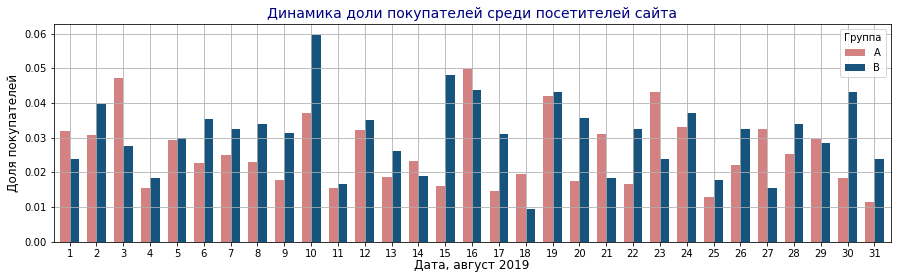

In [25]:
# посмотрим как распределилось количество заказов по дням
ord_vis.pivot_table(index='date', columns='group', values='ord_per_vis').plot.bar(
        color=color_list, width=.7, figsize=(15,4), grid=True)

plt.title('Динамика доли покупателей среди посетителей сайта', size=14, color='navy')
plt.xlabel('Дата, август 2019', size=12, labelpad=.2)
plt.ylabel('Доля покупателей', size=12)
plt.xticks(list(range(0,31)),list(range(1,32)), rotation=0)
plt.legend(title='Группа')
plt.show();

Также как и для количества заказов прослеживается недельная тенденция. Меньше всего покупателей приходило на сайт по субботам. Максимальное значение почти в 6% было было 10 августа клиентами из группы В.

#### Количество заказов на одного покупателя

Посмотрим сколько в среднем заказов приходится на одного покупателя.

In [26]:
#  рассчитаем табличку сначала для всех покупателей, а затем по группам
df_tmp = orders.groupby('user_id').size().value_counts().to_frame()
df_tmp.columns = ['all_users']
df_tmp.index.name = 'orders_per_user'

df_tmp['A'] = (orders.query('group=="A"').groupby('user_id').size()
                .value_counts().to_frame())
df_tmp['B'] = (orders.query('group=="B"').groupby('user_id').size()
                .value_counts().to_frame())

df_tmp = df_tmp.T
df_tmp['total'] = df_tmp[1] + df_tmp[2]*2 + df_tmp[3]*3
df_tmp['2_mean'] = round(df_tmp[2]/df_tmp['total'],4)
df_tmp['3_mean'] = round(df_tmp[3]/df_tmp['total'],4)

display(df_tmp)

orders_per_user,1,2,3,total,2_mean,3_mean
all_users,937,29,7,1016,0.0285,0.0069
A,427,13,5,468,0.0278,0.0107
B,510,16,2,548,0.0292,0.0036


В таблице рассчитана также доля клиентов, совершивших 2 и 3 покупки от общего количества пользователей группы.

- подавляющее большинство покупателей сделали только одну покупку. 2 раза что-то купили чуть меньше 3% клиентов. А 3 раза - менее 1% от всех;
- количество покупателей с числом покупок больше, чем одна в группах А и В одинаково - по 18.

Учитывая, что клиенты, которые попали в обе группы и которых мы исключили из данных, совершали более одной покупки, стоит внимательно отнестись к покупателям с несколькими заказами. 

#### Сумма заказа (величина чека)

In [27]:
print('Cумма одного заказа (руб.) по группам:')
display(orders.groupby('group')['revenue'].describe().astype('int').style.format(thousands=" "))

Cумма одного заказа (руб.) по группам:


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,468,7 189,11 137,50,1 164,3 090,8 438,92 550
B,548,9 249,56 430,50,1 280,2 898,7 991,1 294 500


Ого! Почти 1 миллион 300 тысяч за одну покупку! Ну а если серьёзно, то выбросы есть, причём огромные. Об этом свидетельствуют не только запредельные максимальные значения (особенно в тестовой группе), но и большая разница между средним значением и медианой. 


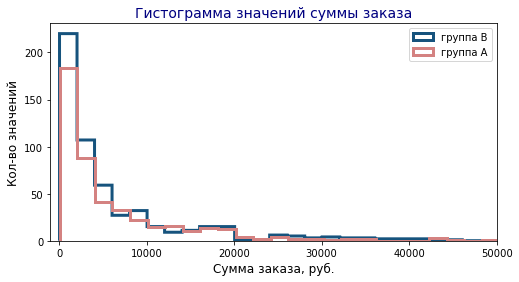

In [28]:
'''
Примечание:
при построении гистораммы используем разное количество корзин для групп А и В,
так как разброс значений в группе В существенно выше.
Количество корзин вычислим разделив максимальную сумму заказа в группе на 2000. 
Минимальная сумма в 50 руб. не повлияет на вычисления.
Таким образом размеры корзин получатся приблизительно одинаковыми в группах
'''

# рассчитаем количество корзин на гистограмме для группы В
value = int(orders.query('group=="B"')['revenue'].max() / 2000)
# построим гистограмму для В
ax = orders.query('group=="B"').plot(y='revenue', kind='hist', bins=value, 
            label='группа В', color=color_list[1], xlim=(-1000,50000), figsize=(8,4),
            histtype='step', linewidth=3)

# рассчитаем количество корзин для группы А 
value = int(orders.query('group=="A"')['revenue'].max() / 2000)
# построим гистрограмму для группы А на тех же осях
orders.query('group=="A"').plot(y='revenue', kind='hist', bins=46, 
            label='группа А', ax=ax, color=color_list[0],
            histtype='step', linewidth=3)


plt.title('Гистограмма значений суммы заказа', size=14, color='navy')
plt.ylabel('Кол-во значений', size=12)
plt.xlabel('Сумма заказа, руб.', size=12)

plt.show();

Судя по гистограмме, большинство заказов как в группе А, так и в группе В, было на сумму, не превышающую 20 тысяч руб., а количество заказов выше 40 тысяч заказов уже очень мало.

### Выбросы в данных

#### Аномальные значения количества заказов

Никаких существенных выбросов в количестве заказов на одного посетителя, как мы выяснили не наблюдается. Большинство клиентов сделали покупку только один раз за период наблюдения. 

Диаграмму рассеяния нет смысла строить. Искать персентили тоже нет смысла для такого маленького количества дискретных значений. Но так как это задание есть в проекте - нарисуем точечный график. Для этого создадим таблицу `user_orders`, где для каждого id покупателя найдём количество сделанных заказов.

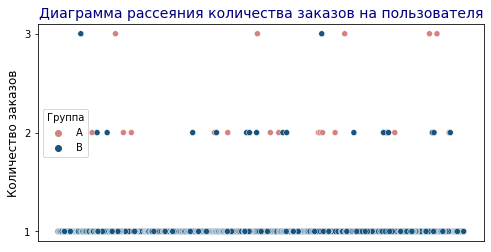

In [29]:
# создадим таблицу
user_orders = orders.groupby(['user_id', 'group']).size().to_frame().reset_index()
user_orders.columns = ['user_id', 'group', 'orders']
user_orders = user_orders.sort_values(by='group')

# точечный график
plt.figure(figsize=(8,4))
sns.scatterplot(data=user_orders.reset_index(), x='index', y="orders", hue="group",
               palette=color_list[0:2])

# подписи к графику
plt.xticks([])
plt.yticks(range(1,4))
plt.title('Диаграмма рассеяния количества заказов на пользователя', size=14, color='navy')
plt.ylabel('Количество заказов', size=12)
plt.xlabel('')
plt.legend(title='Группа')
plt.show();

Перед тем как рассчитывать персентили, обратим внимание, что если персентили определить по сводной таблице `user_orders`, то мы получим проценты от количества пользователей. Доля этих же пользователей в таблице orders будет больше за счёт покупателей с несколькими заказами. 

Поэтому сделаем следующим образом: возьмём из таблицы orders столбец id пользователей и добавим к нему для каждого пользователя количество заказов. Рассчитаем по этой схеме персентили с 92 по 99-й. Воспользуемся встроенным методом Pandas, который считает квантили. 

In [30]:
display(orders['user_id'].to_frame().merge(user_orders, on='user_id', how='left')['orders']
        .quantile([.92, .93, .94, .95, .96, .97, .98, .99]).to_frame().astype(int).T)

,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
orders,1,2,2,2,2,2,2,3


Получается, что мы можем считать аномальными только тех покупателей, у которых всего лишь 3 заказа. (Не надо часто пользоваться услугами интернет-магазинов! 🙂).

Создадим список `users_3` с идентификаторами пользователей, у которых 3 заказа. И посчитаем точный процент таких данных в таблице orders.

In [31]:
# рассчитаем значения для 3 покупок
users_3 = user_orders.query('orders > 2')['user_id']
value = len(orders.query('user_id.isin(@users_3)'))
print(f'Количество покупок, которые совершили пользователи, с тремя заказами: \033[1m{value}\033[0m,')
value = len(orders.query('user_id.isin(@users_3)'))/len(orders)
print(f'что составляет \033[1m{value:0.2%}\033[0m от всех покупок')

Количество покупок, которые совершили пользователи, с тремя заказами: 21,
что составляет 2.07% от всех покупок


#### Самые дорогие покупки

Построим диаграмму рассеяния стоимости заказов.

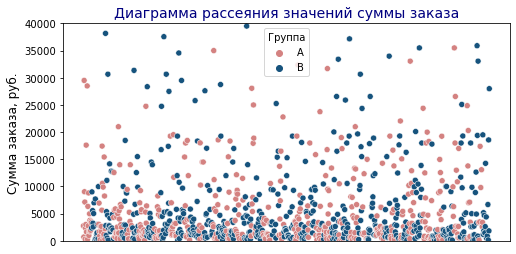

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=orders.reset_index(), x='index', y="revenue", hue="group",
               palette=color_list[0:2])

# немного "приблизим", чтобы точнее разглядеть
plt.ylim(0,40000)
# сделаем подписи
plt.xticks([])
plt.title('Диаграмма рассеяния значений суммы заказа', size=14, color='navy')
plt.ylabel('Сумма заказа, руб.', size=12)
plt.xlabel('')
plt.legend(title='Группа')
plt.show();

Посчитаем, какой процент выручки от одного чека попадает с 95 по 99 персентили.

In [33]:
display(orders['revenue'].quantile([.95, .96, .97, .98, .99]).to_frame()
        .astype(int).T.style.format(thousands=" "))

,0.950000,0.960000,0.970000,0.980000,0.990000
revenue,26 785,30 649,34 791,42 352,53 904


Значения персентилей подтверждают наше предположение - суммы покупок свыше 40 тысяч руб. встречаются редко. Учитывая, что мы уже выбрали 2.07% покупателей в качестве аномальных лишь за то, что они сделали по 3 заказа на сайте, можем исключить также средние чеки с суммой выше, чем 98-ой персентиль. Иначе мы потеряем более 5% данных. Сохраним значение такой суммы в переменную `max_rev` и затем проверим какой процент от всех чеков составят аномальные.

In [34]:
max_rev = int(orders['revenue'].quantile([.98]))
value = len(orders.query('revenue>@max_rev'))/len(orders)
print(f'Покупки на сумму свыше \033[1m{max_rev:,}\033[0m тыс.руб. составляют \033[1m{value:0.2%}\033[0m'
     .replace(',',' '))

Покупки на сумму свыше 42 352 тыс.руб. составляют 2.07%


Интересно получилось. Надеюсь, это не одни и те же записи. 

#### Выбор аномальных данных

Выберем данные, которые решено было считать аномальными - пользователей, совершивших 3 покупки, а также заказы на сумму свыше 40 тыс. руб. Если это количество составит менее 5%, можем смело считать эти данные за выбросы

In [35]:
value = len(orders.query('revenue>@max_rev | user_id.isin(@users_3)')) / len(orders)
print(f'Доля выбросов в данных: \033[1m{value:0.2%}\033[0m')

Доля выбросов в данных: 4.13%


Удалим "выбросы". Учитывая, что объём данных небольшой, сохраним "очищенные данные" в новые датафреймы `ord_clean` и `vis_clean`. Сделаем это следующим образом:

- создадим список из `user_id` покупателей, имеющих сумму чека выше 98-го персентиля или 3 заказа (воспользуемся переменной `max_rev` и списком `users_3`);
- по данным из `orders` найдём в какие даты сколько пользователей с отобранными id совершали покупки;
- вычтем из количества посетителей в таблице `visitors` количество наших покупателей, как мы делали при удалении "покупателей из двух групп";
- удалим все записи для этих пользователей из таблицы заказов.

In [36]:
# выберем из таблицы заказов все записи, которые мы решили считать выбросами
df_tmp = orders.query('revenue>@max_rev | user_id.isin(@users_3)')
# подсчитаем количество таких покупателей по дням и группам
df_tmp = df_tmp.groupby(['date', 'group'])['user_id'].nunique().to_frame().reset_index()

# объединим получившуюся таблицу с таблицей посетителей
vis_clean = visitors.merge(df_tmp, on=['date', 'group'], how='left')
# заполним пропуски нулями
vis_clean['user_id'] = vis_clean['user_id'].fillna(0).astype(int)
# вычтем наших покупателей из количества посетителей
vis_clean['visitors'] -= vis_clean['user_id']

# оставим исходные столбцы
vis_clean = vis_clean[['date', 'group', 'visitors']]

# создадим таблицу ord_clean для "правильных" пользователей
ord_clean = orders.query('revenue<=@max_rev & ~user_id.isin(@users_3)')

### Создание сводных таблиц и функций

#### Расчёт кумулятивных данных

Чтобы два раза не писать один код, создадим функцию `cumul_calc` для расчета таблицы кумулятивных значений. 
В зависимости от параметра `clean` (True или False) расчет будет произведёт по "очищенным" (по таблицам vis_clean и ord_clean) или "сырым" (visitors и orders) данным соответственно.
Функция возвращает таблицу кумулятивных значений:

- `buyers` - количество покупателей;
- `orders` - количество заказов;
- `revenue` - выручку;
- `visitors` - количество посетителей
- `oders_per_user` - среднее количество заказов на посетителя по группам
- `rev_avg` - средний чек

In [37]:
def cumul_calc(clean):
    '''
    Функция рассчета кумулятивных значений
    - если clean = True, то по "очищенным",
    - если clean = False, то по "сырым" данным
    '''
    
    # сначала определимся по каким данным рассчитывать
    if clean:
        df_vis = vis_clean
        df_ord = ord_clean
    else:
        df_vis = visitors
        df_ord = orders
        
    # подсчитаем кумулятивные данные по таблице заказов
    # пары дата-группа возьмём из таблици посетителей
    df = df_vis[['group', 'date']].apply(lambda x: 
                df_ord[(df_ord['date'] <= x['date']) & (df_ord['group'] == x['group'])]
                .agg({'date' : 'max', 'group' : 'max',
                      'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    df.columns = ['date', 'group', 'orders', 'users', 'revenue']
    
    # добавим комулятивное количество посетителей
    df['visitors'] = df_vis.groupby('group')['visitors'].cumsum().to_frame()
    
    # рассчитаем средний чек и конверсию
    # средний чек округлим переведём в целочисленное значение, т.к. речь идёт о тысячах руб.
    df['oders_per_user'] = df['orders'] / df['visitors']
    df['rev_avg'] = (df['revenue'] / df['orders']).astype('int')
    
    return df

C помощью функции создадим таблицы `cumul_raw` и `cumul_clean` по "сырым" и "очищенным" данным соответственно.

In [38]:
cumul_raw = cumul_calc(False)
cumul_clean = cumul_calc(True)

#### Функция для визуализации динамики по группам

In [39]:
def cumul_plot(clean, column, title, ylabel, divider=1):
    '''
    Функция df_plot строит график по данным из таблицы кумулятивных значений
    по группам А и В. 
    Параметры:
    - clean - если True, то используется таблица cumul_clean по очищенным данным,
            - если False, то cumu_raw по сырым данным
    - column - название столбца данных, по которому строим график
    - title - название графика
    - ylabel - подпись оси Y
    - divider - делитель для столбца column для больших сумм
    '''
    
    # сначала определимся с таблицей
    if clean:
        cumul_data = cumul_clean[['date', 'group', column]]
        title += '\nпо "очищенным" данным'
    else:
        cumul_data = cumul_raw[['date', 'group', column]]
        title += '\nпо "сырым" данным'
    
    # cоздадим сводную таблицу для графика
    df = cumul_data.pivot_table(index='date', columns='group', values=column)
    # разделим большие суммы на делитель
    if divider !=1:
        df = (df / divider).astype(int)
    # Заменим индексы на цифры
    df.index=range(1,32)

    #нарисуем график
    df.plot(figsize=(10,4), grid=True, color=color_list, linewidth=2)
    plt.title(title, size=14, color='navy')
    plt.ylabel(ylabel, size=12)
    plt.xlabel('Дата, август 2019', size=12)
    plt.legend(title='Группа')
    plt.xticks(list(range(1,32)),list(range(1,32)), rotation=0)
    plt.show();

#### Функция для визуализации относительных значений

In [40]:
def relative_plot(clean, column, title):
    '''
    Функция relative_plot строит график по данным из таблицы кумулятивных значений, 
    который показывает отношение значений из заданного столбца column
    группы В к группе А. 
    Параметры:
    - clean - если True, то используется таблица cumul_clean по очищенным данным,
            - если False, то cumu_raw по сырым данным
    - column - название столбца данных, по которому строим график
    - title - название графика
    '''

    # сначала определимся с таблицей
    if clean:
        cumul_data = cumul_clean
        title += '\nпо "очищенным" данным'
    else:
        cumul_data = cumul_raw
        title += '\nпо "сырым" данным'
    
    # оставим только нужные данные
    df = cumul_data[['date', 'group', column]]
    # перестроим таблицу, чтобы в каждой строке были значения по группам А и В
    df = df.query('group=="A"')[['date', column]].merge(
         df.query('group=="B"')[['date', column]], 
         on='date', suffixes=['_a', '_b'])
    # найдём отношение нужных значений
    df['res'] = df[column+'_b'] / df[column+'_a'] - 1
    
    # убедимся, что даты в нужном порядке и оставим только столбец со значениями
    df = df.sort_values(by='date')
    df = df['res']
    # заменим индексы на цифры
    df.index=range(1,32)

    #нарисуем график
    df.plot(figsize=(11,4), grid=True, color=color_list[1], linewidth=2, 
            label = 'группа В\nк группе А')
    plt.title(title, size=14, color='navy')
    plt.xlabel('Дата, август 2019', size=12)
    plt.ylabel('Относительная разница значений', size=12)
    plt.xticks(list(range(1,32)),list(range(1,32)), rotation=0)
    plt.axhline(y=0, color=color_list[0], linestyle='--', linewidth=2,
                label='линия равенства')
    plt.axhline(y=df.median(), color=color_list[3], linestyle='-.', linewidth=2,
                label='медиана значений')
    plt.axhline(y=df.mean(), color=color_list[2], linestyle='--', linewidth=2,
                label='среднее значение')
    plt.legend(bbox_to_anchor=(.24, .93, 1., .1), loc='upper right')
    plt.show();    

### Анализ кумулятивных значений

#### Выручка

Построим график динамики кумулятивной выручки по группам по "сырым" данным.

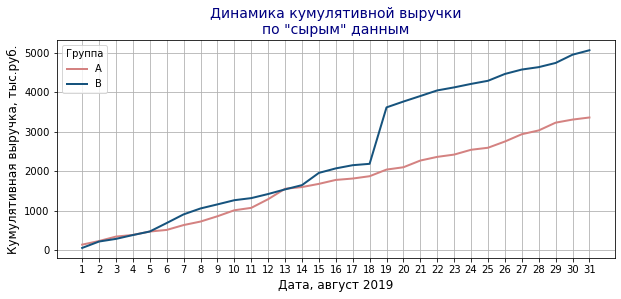

In [41]:
cumul_plot(False, 'revenue', 'Динамика кумулятивной выручки', 
           'Кумулятивная выручка, тыс.руб.', divider=1000)

- Не считая резкого скачка на графике группы В от 19 августа, когда скорее всего и была совершена покупка на сумму более 1мл.руб., кумулятивная выручка росла в двух группах практически одинаково. Посмотрим, насколько изменится график при удалении выбросов.

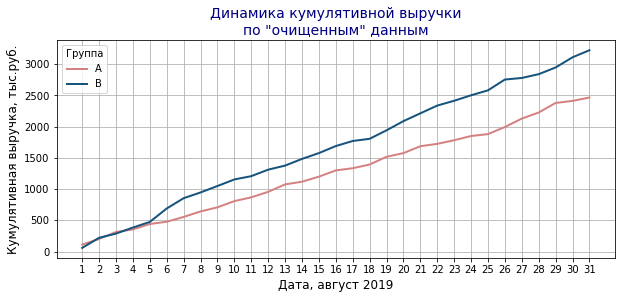

In [42]:
cumul_plot(True, 'revenue', 'Динамика кумулятивной выручки', 
           'Кумулятивная выручка, тыс.руб.', divider=1000)

- Видим, что при удалении выбросов кумулятивные значения снизились и показали ровную динамику. Причём выручка тестовой группы совсем незначительно превысили этот показатель в контрольной группе. Убедимся в этом, построив графики относительных изменений.

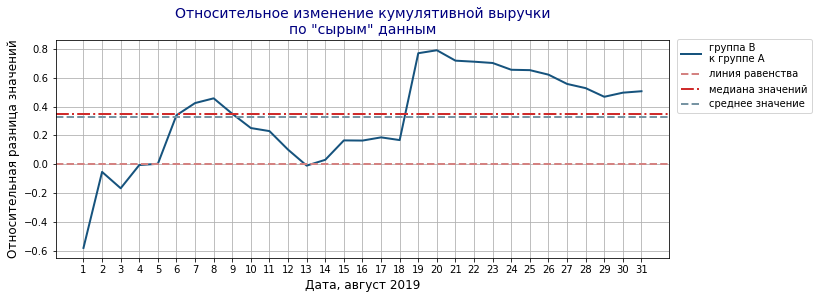

In [43]:
relative_plot(False, 'revenue', 'Относительное изменение кумулятивной выручки')    

- Относительные значения кумулятивной выручки после долгих скачков и колебаний стали медленно снижаться но, по-видимому, не успели окончательно стабилизироваться. 


- К концу месяца кумулятивная выручка группы В на 50% выше, чем у группы А. Но пока не ясно, насколько повлияли такие сильные выбросы на этот результат. Скорее всего реальная разница между выручкой в двух группах гораздо ниже.

Построим такой же график по очищенным данным:

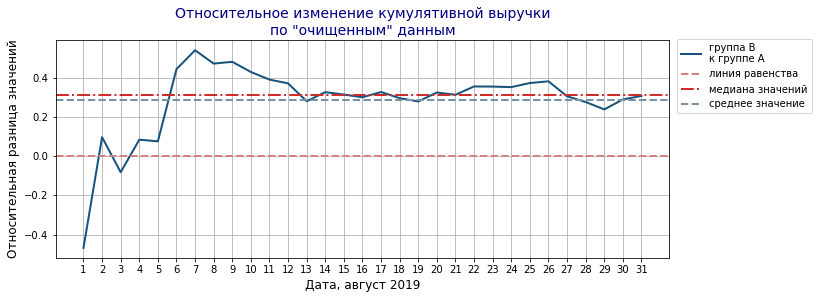

In [44]:
relative_plot(True, 'revenue', 'Относительное изменение кумулятивной выручки')  

- По графику без выбросов видим, что относительное изменение кумулятивной выручки в группах практически стабилизировалось к середине месяца За исключением нескольких "колебаний", куда по-видимому все-таки просочились аномальные значения. 


- Кумулятивная выручка остаётся стабильно выше для тестовой группы.

#### Средний чек

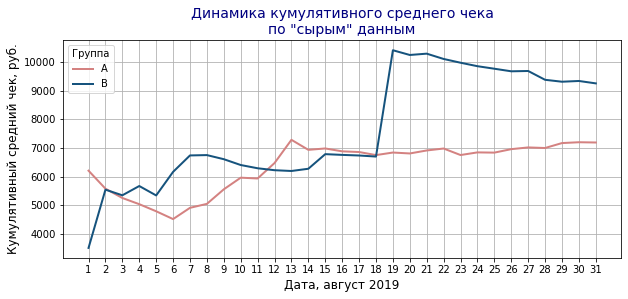

In [45]:
cumul_plot(False, 'rev_avg', 'Динамика кумулятивного среднего чека', 
           'Кумулятивный средний чек, руб.')

- Тот же самый выброс в данных от 19 августа сразу поменял картину для группы B. Значения для группы А выравниваются к концу наблюдений, а для группы В продолжают постепенно снижаться, так как после резкого скачка ещё не подошли к своему реальному значению. 

Выведем эти же данные на графике без выбросов

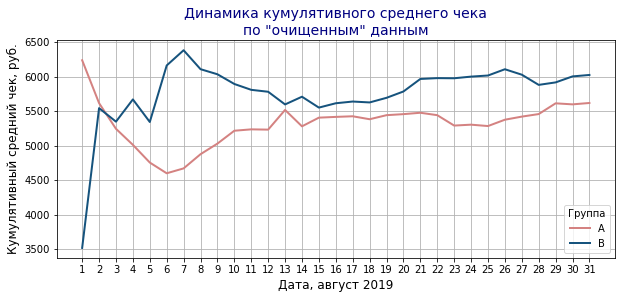

In [46]:
cumul_plot(True, 'rev_avg', 'Динамика кумулятивного среднего чека', 
           'Кумулятивный средний чек, руб.')

- Пропали резкие скачки и появилась красивая симметрия, как по учебнику :)


- Значения кумулятивного среднего чека в тестовой группе стабильно остаются более высокими, чем в контрольной группе.

Построим графики относительного изменения кумулятивного среднего чека группы B к группе A. 

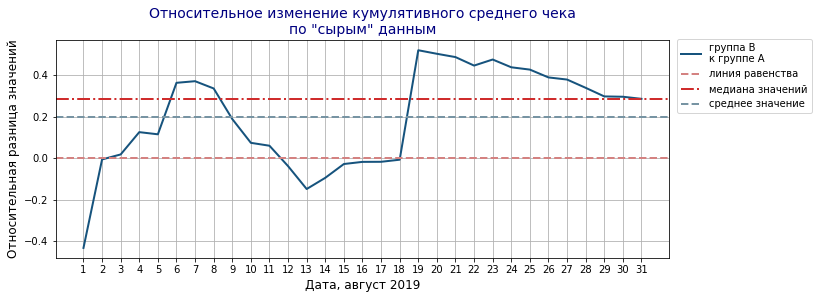

In [47]:
relative_plot(False, 'rev_avg', 'Относительное изменение кумулятивного среднего чека')    

- До 19 августа, когда случился сильный выброс в сумме заказа кумулятивный средний чек в группах А и В почти сравнялся, причем в группе В он был даже чуточку меньше, чем в А. К концу наблюдений относительные значения продолжали медленно снижаться и сравнялись с медианой значений для нашего графика, но не факт, что значения успели стабилизироваться за последние два дня.


- Аномальные значения кумулятивного чека больше зависят от выбросов, чем у кумулятивной выручки, т.к. разница между медианой и средним значением гораздо больше. 


- В целом кумулятивный средний чек в тестовой группе выше приблизительно на 29%, чем в контрольной группе.

Что нам "расскажут очищенные данные":

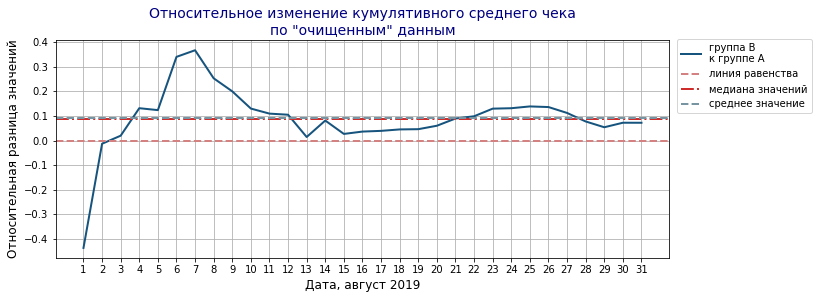

In [48]:
relative_plot(True, 'rev_avg', 'Относительное изменение кумулятивного среднего чека')    

- По этим данным видно, что значения полностью стабилизировались. Кумулятивный средний чек в группе В всего приблизительно на 10% выше, чем в группе А.


- Об отсуствии выбросов говорит то, что медиана и среднее значений практически сравнялись. 

#### Cреднее количество заказов на посетителя

Построим график кумулятивного среднего количества заказов на посетителя по группам.

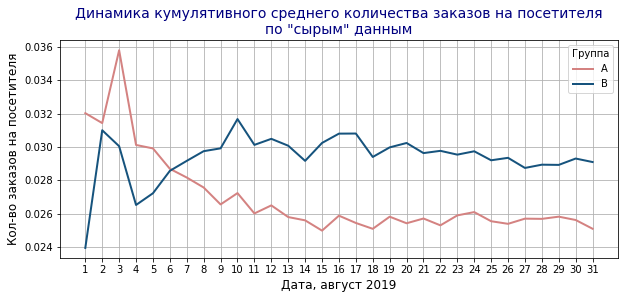

In [49]:
cumul_plot(False, 'oders_per_user', 
           'Динамика кумулятивного среднего количества заказов на посетителя', 
           'Кол-во заказов на посетителя')

- Как обычно на таких графиках, в начале наблюдений значения сильно меняются день ото дня. Но к концу стабилизируются приблизительно на одном уровне. Сильных скачков в значениях мало. 


- В целом пользователи из группы В чаще становятся покупателями. 

Перейдём к "очищенным" данным

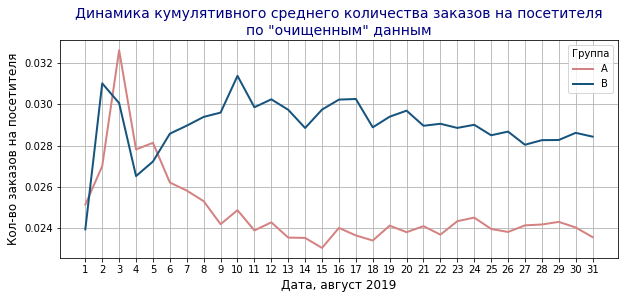

In [50]:
cumul_plot(True, 'oders_per_user', 
           'Динамика кумулятивного среднего количества заказов на посетителя', 
           'Кол-во заказов на посетителя')

- Почти такой же график за исключением того, просто немного изменился масштаб за счёт отстуствия выбросов. 

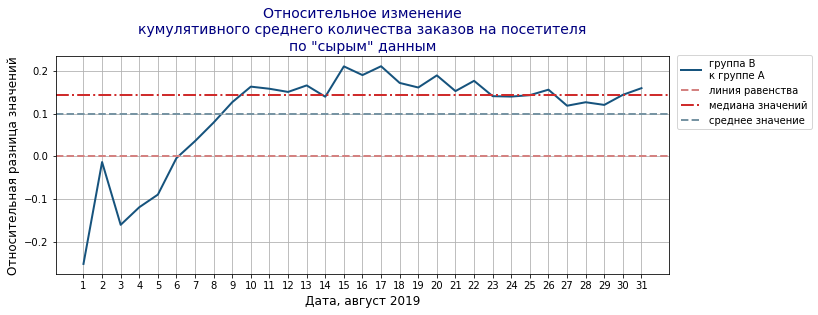

In [51]:
relative_plot(False, 'oders_per_user', 
              'Относительное изменение\nкумулятивного среднего количества заказов на посетителя')

- Относительные значения кумулятивного среднего доли покупок среди посетителей к концу наблюдений колебались вблизи медианных значений. Очень резких скачков эта метрика не показывала. 


- Кумулятивная доля заказов в группе В приблизительно на 14% выше, чем в группе А.

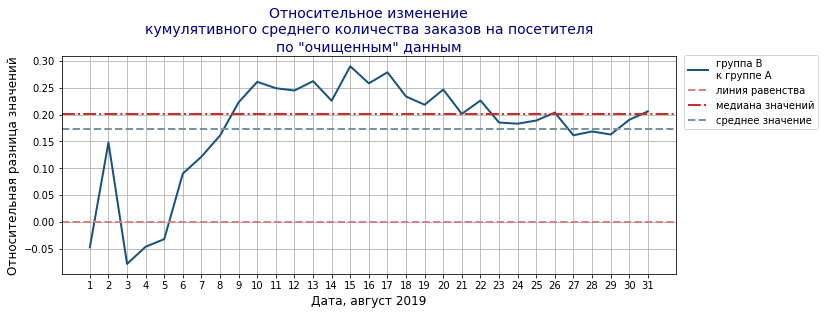

In [52]:
relative_plot(True, 'oders_per_user', 
              'Относительное изменение\nкумулятивного среднего количества заказов на посетителя')

- Интересно, что после удаления аномальных значений, увеличилось среднее значение и медиана. Т.е. кумулятивное количество заказов на посетителя в тестовой группе действительно выше, чем в контрольной.

### Различия между группами

С помощью статистических методов, рассчитаем насколько отличаются данные в тестовой и контрольной группах. Для каждого показателя посчитаем уровень статистической значимости (p-value) различий по "сырым" и по "очищенным" данным. 

#### Функция для определения статистической значимости

Чтобы несколько раз не повторять одинаковый код, создадим функцию для расчета и вывода результатов.

In [53]:
def mann_whit(da, db, H0, H1, alpha=.05):
    '''
    Функция рассчитывает р-уровень статистической значимости
    по тесту Манна-Уитни и выводит результат с выводом и комментариями.
    Параметры:
    - da и db - две выборки для сравнения для групп А и В соответственно;
    - H0 и Н1 - формулировки нулевой и альтернативной гипотез;
    - alpha - уровень значимости, по умолчанию равен 0.05
    '''
    # применим тест Манна-Уитни и рассчитаем уровень статистической значимости
    p_value = st.mannwhitneyu(da, db)[1]
    print(f'p-value = \033[1m{p_value:.4f}\033[0m')
    value = 1 - round(p_value, 4)
    
    print()
    print('\033[1mВыводы\033[0m:')
    if p_value < alpha:
        print('- Отвергаем нулевую гипотезу. Разница значений статистически значима.')
        print(f'- \033[1m{H1}\033[0m  с вероятностью \033[1m{value:.2%}\033[0m')
    else:
        print('- Не получилось отвергнуть нулевую гипотезу.')
        print(f'- \033[1m{H0}\033[0m  с вероятностью \033[1m{p_value:.2%}\033[0m')
        
    # найдем относительную разницу средних значений выборок
    value = db.mean()/da.mean()-1
    print(f'- Средние значения группы В отличаются на \033[1m{value:.2%}\033[0m от значений группы А')    
    

#### Различия в среднем количестве заказов на посетителя по «сырым» данным

Сформулируем гипотезы нулевую и альтернативную гипотезы:
<p></p>
<font style="color:navy">
$Н_0= $ «<b>Среднее количество заказов на посетителя в группах А и В по "сырым данным" одинаковое</b>»
<br>
$Н_1= $ «<b>Среднее количество заказов на посетителя в группах А и В  по "сырым данным" разное</b>»
<br>
  $\alpha = 0.05$
</font>

Подсчитаем статистическую значимость c помощью непараметрического теста Манна-Уитни, который даёт хорошие результаты при наличии выбросов. 
Для этого подготовим данные следующим образом:
- создадим два столбца Series для каждой из групп;
- длину столбца рассчитаем как количество всех посетителей из этой группы;
- для покупателей заполним столбец количеством заказов, воспользуемся имеющейся таблицей `user_orders`;
- остальные значения заполним нулями;
- сравним с помощью теста получившиеся выборки.

In [54]:
# количество посетителей из группы А
value = visitors.query('group=="A"')['visitors'].sum()
# вычтем из них количество покупателей из группы А
value -= len(user_orders.query('group=="A"'))
# создадим столбец
sa = pd.Series(list(user_orders.query('group=="A"')['orders']) + [0]*value)

# сделаем также для группы В
value = visitors.query('group=="B"')['visitors'].sum() - len(user_orders.query('group=="B"'))
sb = pd.Series(list(user_orders.query('group=="B"')['orders']) + [0]*value)

# применим тест
mann_whit(sa, sb,
          'Среднее количество заказов на посетителя в группах А и В  по "сырым данным" одинаковое',
          'Среднее количество заказов на посетителя в группах А и В  по "сырым данным" разное')

p-value = 0.0111

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Среднее количество заказов на посетителя в группах А и В  по "сырым данным" разное  с вероятностью 98.89%
- Средние значения группы В отличаются на 15.96% от значений группы А


- Если мы бы выбрали уровень значимости 0.01, то не смогли бы уже опровергнуть гипотезу. Возможно, что влияют выбросы, в которые мы включили пользователей с тремя заказами. Окончательный вывод можно будет сделать после сравнения "очищенных" данных.

#### Различия в среднем количестве заказов на посетителя по «очищенным» данным

Сформулируем гипотезы.
<p></p>
<font style="color:navy">
$Н_0= $ «<b>Среднее количество заказов на посетителя в группах А и В по "очищенным данным" одинаковое</b>»
<br>
$Н_1= $ «<b>Среднее количество заказов на посетителя в группах А и В по "очищенным данным" разное</b>»
<br>
  $\alpha = 0.05$
</font>

Повторим расчёты для "сырых" данных, но уже с новыми таблицами, содержащими "очищенные" данные. Только вместо использованной таблицы user_orders создадим аналогичный датафрейм `us_ord_clean` по новым данным.

In [55]:
us_ord_clean = ord_clean.groupby(['user_id', 'group']).size().to_frame().reset_index()
us_ord_clean.columns = ['user_id', 'group', 'orders']
us_ord_clean = us_ord_clean.sort_values(by='group')

# количество посетителей из группы А
value = vis_clean.query('group=="A"')['visitors'].sum()
# вычтем из них количество покупателей из группы А
value -= len(us_ord_clean.query('group=="A"'))
# создадим столбец
sa = pd.Series(list(us_ord_clean.query('group=="A"')['orders']) + [0]*value)

# сделаем также для группы В
value = vis_clean.query('group=="B"')['visitors'].sum() - len(us_ord_clean.query('group=="B"'))
sb = pd.Series(list(us_ord_clean.query('group=="B"')['orders']) + [0]*value)

# применим тест
mann_whit(sa, sb,
          'Среднее количество заказов на посетителя в группах А и В по "очищенным данным" одинаковое',
          'Среднее количество заказов на посетителя в группах А и В по "очищенным данным" разное')

p-value = 0.0041

Выводы:
- Отвергаем нулевую гипотезу. Разница значений статистически значима.
- Среднее количество заказов на посетителя в группах А и В по "очищенным данным" разное  с вероятностью 99.59%
- Средние значения группы В отличаются на 20.62% от значений группы А


- При таком низком уровне статистической значимости почти не остаётся сомнений в том, что количество заказов в тестовой группе в среднем приблизительно на 16-20% выше, чем в контрольной группе. 

#### Различия в среднем чеке заказа по «сырым» данным

Сформулируем гипотезы.
<p></p>
<font style="color:navy">
$Н_0= $ «<b>Величина среднего чека  по "сырым данным" одинаковая для групп А и В</b>»
<br>
$Н_1= $ «<b>Величина среднего чека  по "сырым данным" в группах А и В различается</b>»
<br>
  $\alpha = 0.05$
</font>

Подсчитаем статистическую значимость c помощью теста Манна-Уитни. 

In [56]:
# применим тест
mann_whit(orders.query('group=="A"')['revenue'], 
          orders.query('group=="B"')['revenue'],
          'Величина среднего чека  по "сырым данным" одинаковая для групп А и В',
          'Величина среднего чека  по "сырым данным" в группах А и В различается')

p-value = 0.8295

Выводы:
- Не получилось отвергнуть нулевую гипотезу.
- Величина среднего чека  по "сырым данным" одинаковая для групп А и В  с вероятностью 82.95%
- Средние значения группы В отличаются на 28.66% от значений группы А


- Несмотря на то, что средние значения суммы заказа в тестовой группе почти на 29% выше, чем в контрольной группе, у нас нет оснований отвергнуть нулевую гипотезу.

- Такие результаты однозначно говорят об аномально больших значениях, которые сказываются на разнице средних чеков по группам, но не сильно отразились на уровне статистической значимости, т.к. тест Манна-Уитни менее чувствителен к выбросам.

#### Различия в среднем чеке заказа по «очищенным» данным

Сформулируем гипотезы.
<p></p>
<font style="color:navy">
$Н_0= $ «<b>Величина среднего чека по "очищенным данным" одинаковая для групп А и В</b>»
<br>
$Н_1= $ «<b>Величина среднего чека по "очищенным данным" в группах А и В различается</b>»
<br>
  $\alpha = 0.05$
</font>

Подсчитаем статистическую значимость c помощью теста Манна-Уитни. 

In [57]:
# применим тест
mann_whit(ord_clean.query('group=="A"')['revenue'], 
          ord_clean.query('group=="B"')['revenue'],
          'Величина среднего чека по "очищенным данным" одинаковая для групп А и В',
          'Величина среднего чека по "очищенным данным" в группах А и В различается')

p-value = 0.9007

Выводы:
- Не получилось отвергнуть нулевую гипотезу.
- Величина среднего чека по "очищенным данным" одинаковая для групп А и В  с вероятностью 90.07%
- Средние значения группы В отличаются на 7.25% от значений группы А


- Также как и в случае с "сырыми" данными, нет оснований отвергать нулевую гипотезу о равенстве среднего чека в тестовой и контрольной группах. 
- Если учесть, что в данных присутствовали гигантские выбросы по сумме заказа, которые мы убрали, то относительная разница средних менее чем в 7% выглядит более убедительной, чем рассчитанное значение в 29% по "сырым" данным. 

### Выводы

<font style="color:navy"><b>По изучению данных:</b></font>

1. Деление на контрольную и тестовую группу по количеству посетителей было выполнено корректно - ежедневные значения количества визитов для разных групп практически совпадало. 


2. Однако чуть менее 6% покупателей совершили заказы на разных тестовых страницах, т.е. попали в разные группы. Следует разобраться в причинах, чтобы избежать подобных ошибок в будущем.
    - как выяснилось, это могут быть далеко не только проблемы технического характера. Так, например, одной из распространённых причин бывают  действия сотрудников интернет-магазинов, которые, попав в один из сегментов теста, оформляют заказы, поступившие по телефону, в то время как звонящие находятся во всех возможных группах :). 


3. Покупатели, попавшие в две группы, совершили 2 или более покупок. В то время как 92% всех покупателей сделали только один заказ. Это свидетельствует о том, что причина скорее всего технического характера. Возможно некорректно отслеживалось повторное появление покупателей на сайте.


4. Желательно корректно выгружать данные теста и иметь информацию не просто о посетителях, но и об их id, т.е. добавить user_id в таблицу visitors для анализа. Тогда можно будет:
    - отсеять не только покупателей, но и посетителей, которые возможно некорректно были отобраны и попали в обе группы;
    - при удалении из данных покупателей, попавших в две группы, а также при исключении выбросов, можно будет соответственно исключить таких клиентов из таблицы посетителей;
    - исключить вероятность того, что большой процент данных о посетителях содержал ошибки.

<font style="color:navy"><b>По анализу результатов теста:</b></font>

1. Средние значение количества заказов на посетителя статистически значимо различаются с вероятностью около 99% как по сырым данным, так и по данным без выбросов. При этом количество заказов на посетителя в тестовой группе выше приблизительно на 16% (судя по "очищенным" данным). А значит:
    - проверяемая нашим А/В тестом гипотеза способна увеличить конверсию посетителей в покупатели и увеличить количество заказов.


2. Расчет р-уровня статистической значимости для сравнения средних значений суммы чека показал, что с вероятностью около 90% сумма покупок не зависит от группы теста. Всё же для тестовой группы эти значения выше (приблизительно на 7% по данным без выбросов). 


3. Продолжать тест нет необходимости, так как 
    - уже получен статистически значимый результат о разнице средних количества заказов на посетителя;
    - средний чек в тестовой группе стабильно выше среднего чека контрольной группы, хотя и незначительно, 
    - ошибки, связанные с делением трафика посетителей сайта на группы будут только накапливаться и как следствие приводить к новым выбросам и ошибкам. 

<font style="color:navy">Решение по результатам теста: <b>«Остановить тест»</b></font>

- Средние значение количества заказов на посетителя в тестовой группе выше приблизительно на 16%.
- Статистически значимой разницы между средними значениями чека в группах не подтверждено.